In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install librosa --user

In [ ]:
!pip install tqdm

In [ ]:
!pip install tensorflow

In [50]:
import tensorflow as tf

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os
import tqdm

In [52]:
filename = '/content/drive/MyDrive/UrbanSound8K/dog_bark.wav'


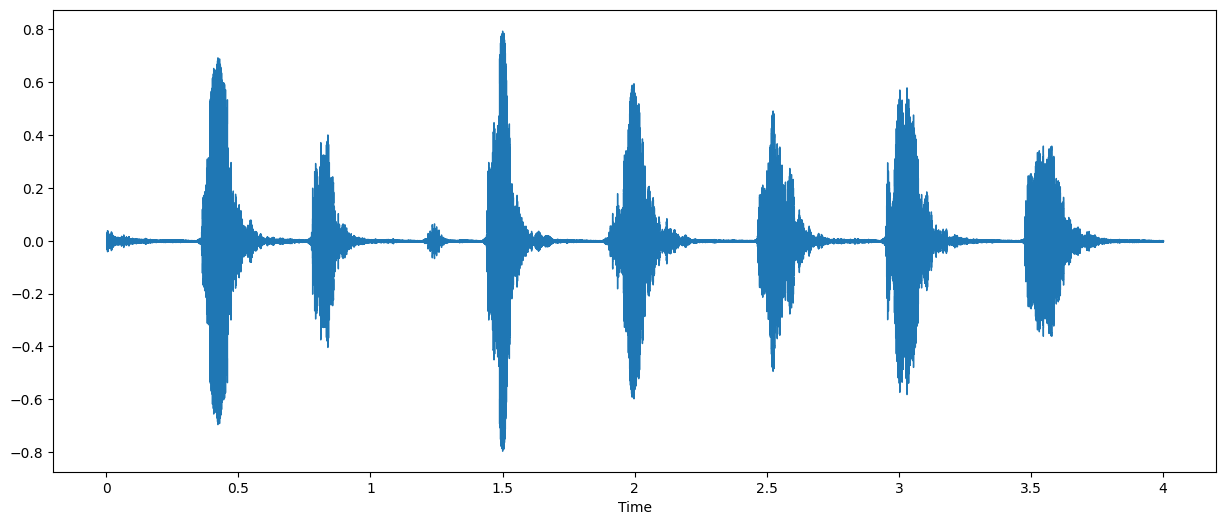

In [53]:
plt.figure(figsize=(15,6))
librosa_data, sample_rate = librosa.load(filename)
librosa.display.waveshow(librosa_data, sr=sample_rate)
ipd.Audio(filename)

In [54]:
print(librosa_data.shape)
librosa_data

(88200,)


array([0.00856121, 0.02041664, 0.0270719 , ..., 0.00203417, 0.00166276,
       0.00083364], dtype=float32)

In [55]:
sample_rate

22050

In [56]:
from scipy.io import wavfile as wav

wav_sample_rate, wav_data = wav.read(filename)
wav_data


array([[-380,  941],
       [ 299, 1475],
       [-266, 1036],
       ...,
       [-316,  433],
       [-318,  443],
       [-324,  436]], dtype=int16)

In [57]:
wav_sample_rate

11025

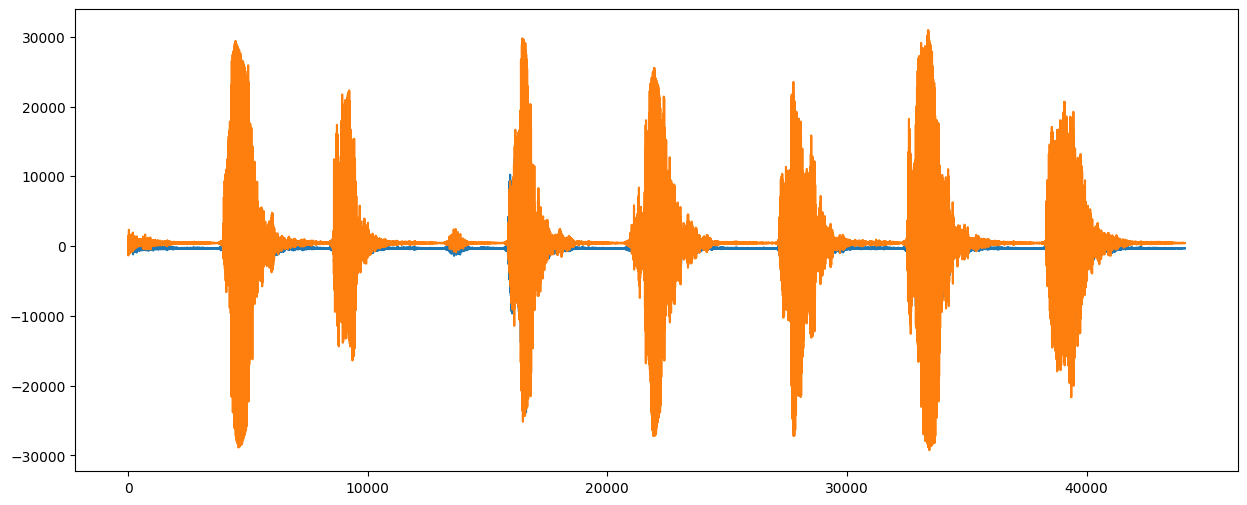

In [58]:
plt.figure(figsize=(15,6))
plt.plot(wav_data)

In [59]:
metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')

metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [60]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [61]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Features extraction

In [62]:
mfccs = librosa.feature.mfcc(y=librosa_data, sr=sample_rate, n_mfcc=40)  # mfcc--> Mel-Feature Cepstrum Coefficients
mfccs.shape

(40, 173)

In [63]:
mfccs

array([[-3.0465457e+02, -3.0076831e+02, -3.2697015e+02, ...,
        -4.8570035e+02, -4.9850476e+02, -4.9910956e+02],
       [ 9.6802307e+01,  9.5446594e+01,  8.7721756e+01, ...,
         2.8050844e+01,  1.6862579e+01,  1.8292789e+01],
       [-4.4262650e+01, -5.3070969e+01, -4.9587818e+01, ...,
         7.9917240e+00,  9.6012249e+00,  1.5320714e+01],
       ...,
       [-3.5441134e+00, -5.0144634e+00, -6.2928591e+00, ...,
         4.9601903e+00,  2.9500496e-01, -3.8347930e-01],
       [-2.0438569e+00, -4.3356333e+00, -8.1547966e+00, ...,
         3.6727147e+00, -1.4211607e-01, -4.7214472e-01],
       [ 2.0813518e+00,  1.0038744e+00, -9.0400326e-01, ...,
         4.3910794e+00,  5.8815956e-01,  2.0350152e-01]], dtype=float32)

In [64]:
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [65]:
def feature_extractor(filename):
    audio_data, sample_rate = librosa.load(filename)
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [66]:
audio_dataset_path = '/content/drive/MyDrive/UrbanSound8K/audio'

In [67]:
from tqdm import tqdm

extracted_features = []
for idx, row in tqdm(metadata.iterrows()):
    filename = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row['fold'])+'/'+str(row['slice_file_name']))
    class_label = row['class']
    data = feature_extractor(filename)
    extracted_features.append([data,class_label])

3552it [02:11, 35.59it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8321it [04:38, 50.68it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [04:38, 58.54it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [04:50, 30.05it/s]


In [68]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
extracted_features_df

,features,class
0,"[-211.93698, 62.581215, -122.813156, -60.74529...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578075, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690285,...",children_playing
...,...,...
8727,"[-391.3721, 125.36239, -40.634056, 25.899754, ...",car_horn
8728,"[-339.42715, 76.409096, -35.30988, 41.984035, ...",car_horn
8729,"[-297.31534, 102.09026, -36.75108, 26.816488, ...",car_horn
8730,"[-336.92386, 115.3139, -44.84709, 24.968985, -...",car_horn


In [69]:
X = np.array(extracted_features_df['features'].tolist())
y= np.array(extracted_features_df['class'].tolist())

In [70]:
X.shape

(8732, 40)

In [71]:
y.shape

(8732,)

In [72]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [73]:
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [74]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:
total_labels = y.shape[1]

In [76]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 321)

In [77]:
X_train_tuner,X_val,y_train_tuner,y_val = train_test_split(X_train,y_train,test_size=0.2, random_state = 321)

In [78]:
X_train_tuner.shape

(5588, 40)

In [79]:
y_train_tuner.shape

(5588, 10)

In [80]:
y_test.shape

(1747, 10)

In [81]:
X_val.shape

(1397, 40)

In [ ]:
!pip install -U keras-tuner

In [88]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import keras_tuner
from keras_tuner import RandomSearch

In [84]:
import keras_tuner
from keras_tuner import RandomSearch

In [85]:
hp = keras_tuner.HyperParameters()


In [86]:
def build_model(hp):
    model = Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int("num_layers", 1, 10)):
        model.add(layers.Dense(hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
        if hp.Boolean(f'dropout_{i}'):
            model.add(layers.Dropout(0.25))

    model.add(layers.Dense(units=total_labels, activation='softmax'))

    learning_rate = hp.Float('ls', min_value=0.00001, max_value=0.001, sampling='log')
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [89]:
tuner = RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    directory="F:",
    project_name="tuned_ANN_speech"
    )

In [90]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_0 (Boolean)
{'default': False, 'conditions': []}
ls (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.001, 'step': None, 'sampling': 'log'}


In [91]:
tuner.search(X_train_tuner, y_train_tuner, epochs=50, validation_data=(X_val, y_val), verbose=1)

Trial 10 Complete [00h 01m 24s]
val_accuracy: 0.37151038646698

Best val_accuracy So Far: 0.9141016602516174
Total elapsed time: 00h 11m 41s


In [92]:
tuner.results_summary()

Results summary
Results in F:/tuned_ANN_speech
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
num_layers: 4
units_0: 480
dropout_0: True
ls: 0.0007537119294169524
units_1: 480
dropout_1: True
units_2: 288
dropout_2: False
units_3: 32
dropout_3: False
Score: 0.9141016602516174

Trial 03 summary
Hyperparameters:
num_layers: 6
units_0: 352
dropout_0: True
ls: 0.0004561896914979461
units_1: 448
dropout_1: True
units_2: 480
dropout_2: False
units_3: 32
dropout_3: True
units_4: 384
dropout_4: False
units_5: 256
dropout_5: True
units_6: 480
dropout_6: False
units_7: 32
dropout_7: False
units_8: 160
dropout_8: True
Score: 0.9047960042953491

Trial 08 summary
Hyperparameters:
num_layers: 7
units_0: 96
dropout_0: False
ls: 0.00019277164387713426
units_1: 160
dropout_1: False
units_2: 480
dropout_2: True
units_3: 160
dropout_3: False
units_4: 256
dropout_4: True
units_5: 448
dropout_5: False
units_6: 96
dropout_6: True
units_7: 448
dropou

In [93]:
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)

In [94]:
model.build(input_shape=(None, 40))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 40)                0         
                                                                 
 dense_10 (Dense)            (None, 480)               19680     
                                                                 
 dropout_6 (Dropout)         (None, 480)               0         
                                                                 
 dense_11 (Dense)            (None, 480)               230880    
                                                                 
 dropout_7 (Dropout)         (None, 480)               0         
                                                                 
 dense_12 (Dense)            (None, 288)               138528    
                                                                 
 dense_13 (Dense)            (None, 32)               

In [95]:
model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
110/110 [==============================] - 3s 9ms/step - loss: 2.6059 - accuracy: 0.1267 - val_loss: 2.2317 - val_accuracy: 0.1563
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 2.2295 - accuracy: 0.1546 - val_loss: 2.1704 - val_accuracy: 0.1815
Epoch 3/100
110/110 [==============================] - 1s 6ms/step - loss: 2.1484 - accuracy: 0.2064 - val_loss: 2.0634 - val_accuracy: 0.2313
Epoch 4/100
110/110 [==============================] - 1s 7ms/step - loss: 2.0658 - accuracy: 0.2450 - val_loss: 1.9945 - val_accuracy: 0.2765
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 2.0124 - accuracy: 0.2666 - val_loss: 1.9156 - val_accuracy: 0.3200
Epoch 6/100
110/110 [==============================] - 1s 5ms/step - loss: 1.8602 - accuracy: 0.3336 - val_loss: 1.6992 - val_accuracy: 0.4156
Epoch 7/100
110/110 [==============================] - 1s 5ms/step - loss: 1.7196 - accuracy: 0.3973 - val_loss: 1.5718 - val_accuracy: 0.4310

In [96]:
model.save('ANN_hypertuned_model')

In [97]:
test_accuracy = model.evaluate(X_test, y_test, verbose=1)

55/55 [==============================] - 0s 3ms/step - loss: 0.3076 - accuracy: 0.9336
